In [85]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [126]:
# Datei laden
file_path = "Datensatz_Airbnb.csv"
airbnb_data = pd.read_csv(file_path)

# Anzeigen der ersten Zeilen des Datensatzes, um einen Überblick zu bekommen
airbnb_data


City       Price      Day        Room Type  Shared Room  \
0      Amsterdam  194.033698  Weekday     Private room        False   
1      Amsterdam  344.245776  Weekday     Private room        False   
2      Amsterdam  264.101422  Weekday     Private room        False   
3      Amsterdam  433.529398  Weekday     Private room        False   
4      Amsterdam  485.552926  Weekday     Private room        False   
...          ...         ...      ...              ...          ...   
41709     Vienna  715.938574  Weekend  Entire home/apt        False   
41710     Vienna  304.793960  Weekend  Entire home/apt        False   
41711     Vienna  637.168969  Weekend  Entire home/apt        False   
41712     Vienna  301.054157  Weekend     Private room        False   
41713     Vienna  133.230489  Weekend     Private room        False   

       Private Room  Person Capacity  Superhost  Multiple Rooms  Business  \
0              True              2.0      False               1         0   
1              True              4.0      False               0         0   
2              True              2.0      False               0         1   
3              True              4.0      False               0         1   
4              True              2.0       True               0         0   
...             ...              ...        ...             ...       ...   
41709         False              6.0      False               0         1   
41710         False              2.0      False               0         0   
41711         False              2.0      False               0         0   
41712          True              2.0      False               0         0   
41713          True              4.0       True               1         0   

       Cleanliness Rating  Guest Satisfaction  Bedrooms  City Center (km)  \
0                    10.0                93.0         1          5.022964   
1                     8.0                85.0         1          0.488389   
2                     9.0                87.0         1          5.748312   
3                     9.0                90.0         2          0.384862   
4                    10.0                98.0         1          0.544738   
...                   ...                 ...       ...               ...   
41709                10.0               100.0         3          0.530181   
41710                 8.0                86.0         1          0.810205   
41711                10.0                93.0         1          0.994051   
41712                10.0                87.0         1          3.044100   
41713                10.0                93.0         1          1.263932   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
0                 2.539380         78.690379                     4.166708   
1                 0.239404        631.176378                    33.421209   
2                 3.651621         75.275877                     3.985908   
3                 0.439876        493.272534                    26.119108   
4                 0.318693        552.830324                    29.272733   
...                    ...               ...                          ...   
41709             0.135447        219.402478                    15.712158   
41710             0.100839        204.970121                    14.678608   
41711             0.202539        169.073402                    12.107921   
41712             0.287435        109.236574                     7.822803   
41713             0.480903        150.450381                    10.774264   

       Restraunt Index  Normalised Restraunt Index  
0            98.253896                    6.846473  
1           837.280757                   58.342928  
2            95.386955                    6.646700  
3           875.033098                   60.973565  
4           815.305740                   56.811677  
...                ...                         ...  
41709       4

# Durchschnitt Preis/Nacht

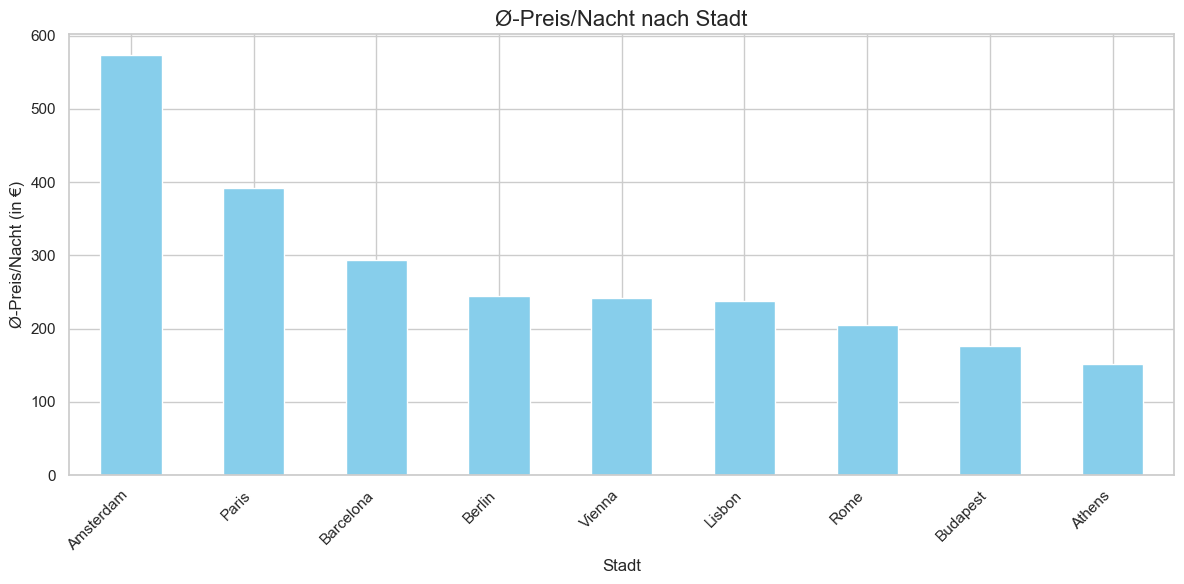

In [197]:
# Berechnung des durchschnittlichen Preises pro Stadt
avg_price_per_city = airbnb_data.groupby("City")["Price"].mean().sort_values(ascending=False)

# Erstellung des Barplots
plt.figure(figsize=(12, 6))
avg_price_per_city.plot(kind="bar", color="skyblue")

# Hinzufügen von Titel und Achsenbeschriftungen
plt.title("Ø-Preis/Nacht nach Stadt", fontsize=16)
plt.xlabel("Stadt", fontsize=12)
plt.ylabel("Ø-Preis/Nacht (in €)", fontsize=12)

# Anzeige des Plots
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [5]:
avg_price_per_city


City
Amsterdam    573.112795
Paris        392.531403
Barcelona    293.753706
Berlin       244.583752
Vienna       241.582484
Lisbon       238.210479
Rome         205.391950
Budapest     176.513548
Athens       151.744121
Name: Price, dtype: float64

# Anzahl AirBnB Angebote nach Städten

In [18]:
# Gruppieren nach Stadt und Zählen der Angebote
city_counts = airbnb_data.groupby('City').size().reset_index(name='Anzahl der Angebote')

# Sortieren nach Anzahl der Angebote in absteigender Reihenfolge
city_counts = city_counts.sort_values('Anzahl der Angebote', ascending=False)


        City  Anzahl der Angebote
7       Rome                 9027
6      Paris                 6688
5     Lisbon                 5763
1     Athens                 5280
4   Budapest                 4022
8     Vienna                 3537
2  Barcelona                 2833
3     Berlin                 2484
0  Amsterdam                 2080


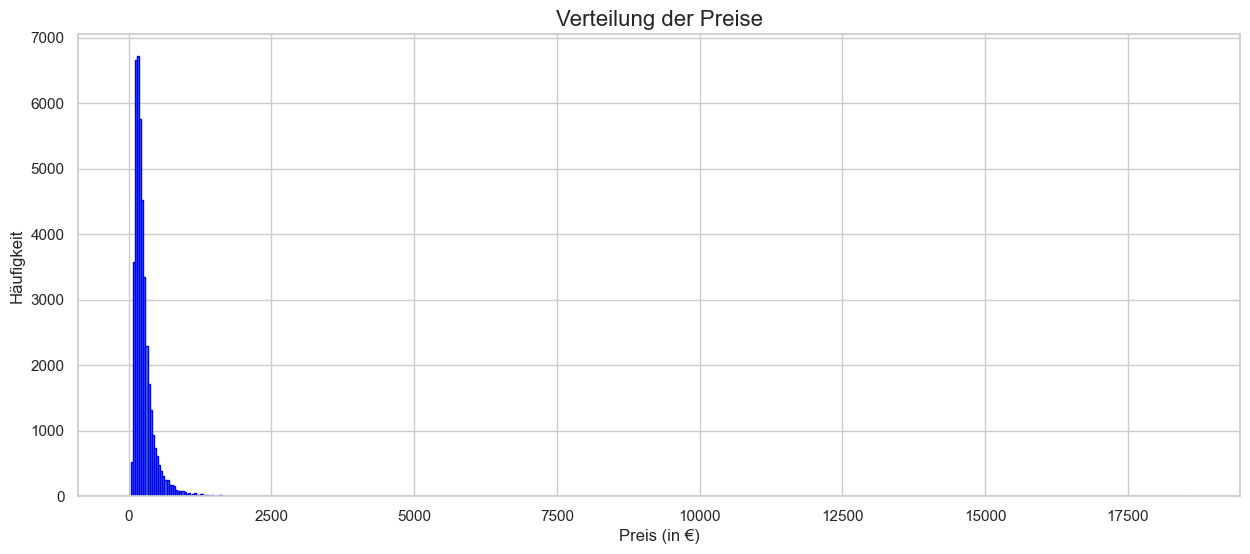

In [196]:
plt.figure(figsize=(15, 6))
plt.hist(airbnb_data["Price"], bins=500, edgecolor="blue")
plt.title("Verteilung der Preise", fontsize=16)
plt.xlabel("Preis (in €)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.show()

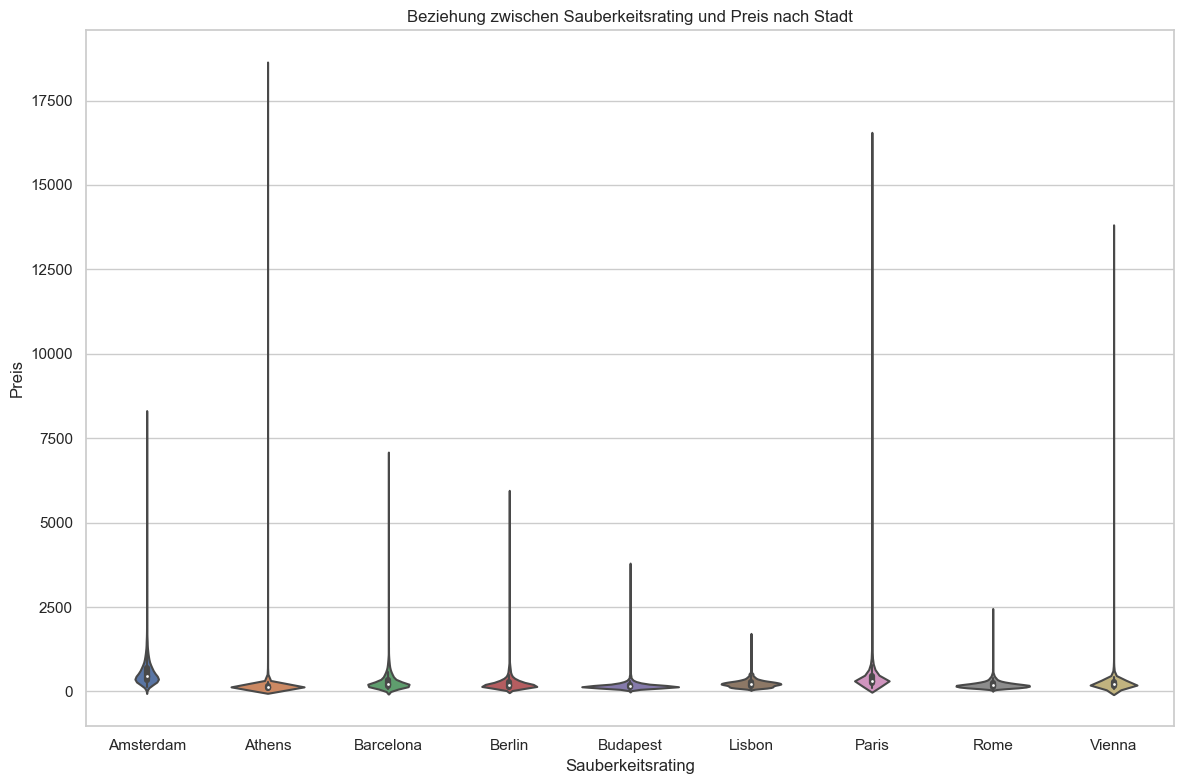

In [203]:
# Erstellen des Streudiagramms mit Seaborn
plt.figure(figsize=(12, 8))
sns.violinplot(data=airbnb_data, x="City", y="Price", alpha=0.6)

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Sauberkeitsrating")
plt.ylabel("Preis")
plt.title("Beziehung zwischen Sauberkeitsrating und Preis nach Stadt")



# Verbessern des Layouts
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

# Durchschnitt Sauberkeitsrating nach Städte

In [42]:
# Gruppieren nach Stadt und Berechnen des Durchschnitts der Cleanliness Ratings
city_cleanliness = airbnb_data.groupby("City")["Cleanliness Rating"].mean().reset_index().round(2)

# Umbenennen der Spalten für bessere Lesbarkeit
city_cleanliness.columns = ["Stadt", "Ø-Sauberkeitsrating"]

# Sortieren nach durchschnittlicher Sauberkeit in absteigender Reihenfolge
city_cleanliness = city_cleanliness.sort_values("Ø-Sauberkeitsrating", ascending=False)

city_cleanliness

Stadt  Ø-Sauberkeitsrating
1     Athens                 9.64
7       Rome                 9.51
4   Budapest                 9.48
0  Amsterdam                 9.47
8     Vienna                 9.47
3     Berlin                 9.46
5     Lisbon                 9.37
2  Barcelona                 9.29
6      Paris                 9.26

Text(0.5, 1.0, 'Durchschnittliche Sauberkeitsrating nach Städten')

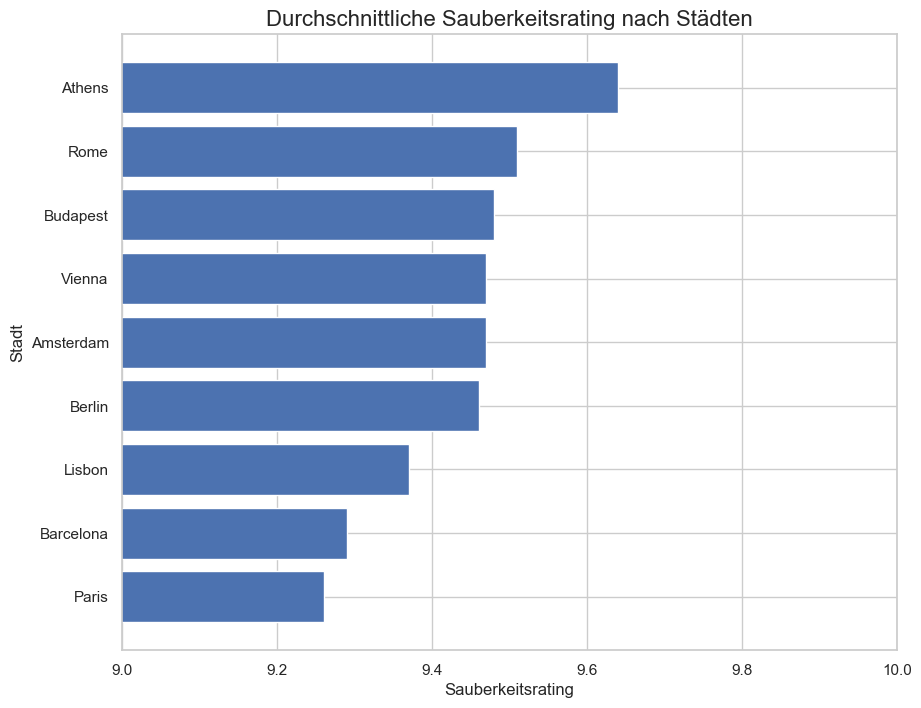

In [184]:
# Sortieren der Daten nach Sauberkeitswert in absteigender Reihenfolge
city_cleanliness_sorted = city_cleanliness.sort_values(
                                                    "Ø-Sauberkeitsrating", 
                                                    ascending=True
                                                    )
# Erstellen des horizontalen Balkendiagramms
plt.figure(figsize=(10, 8))
plt.barh(city_cleanliness_sorted["Stadt"], city_cleanliness_sorted["Ø-Sauberkeitsrating"])
# Range der x-Achse festlegen
plt.xlim(9, 10)
# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Sauberkeitsrating", fontsize=12)
plt.ylabel("Stadt", fontsize=12)
plt.title("Durchschnittliche Sauberkeitsrating nach Städten", fontsize=16)

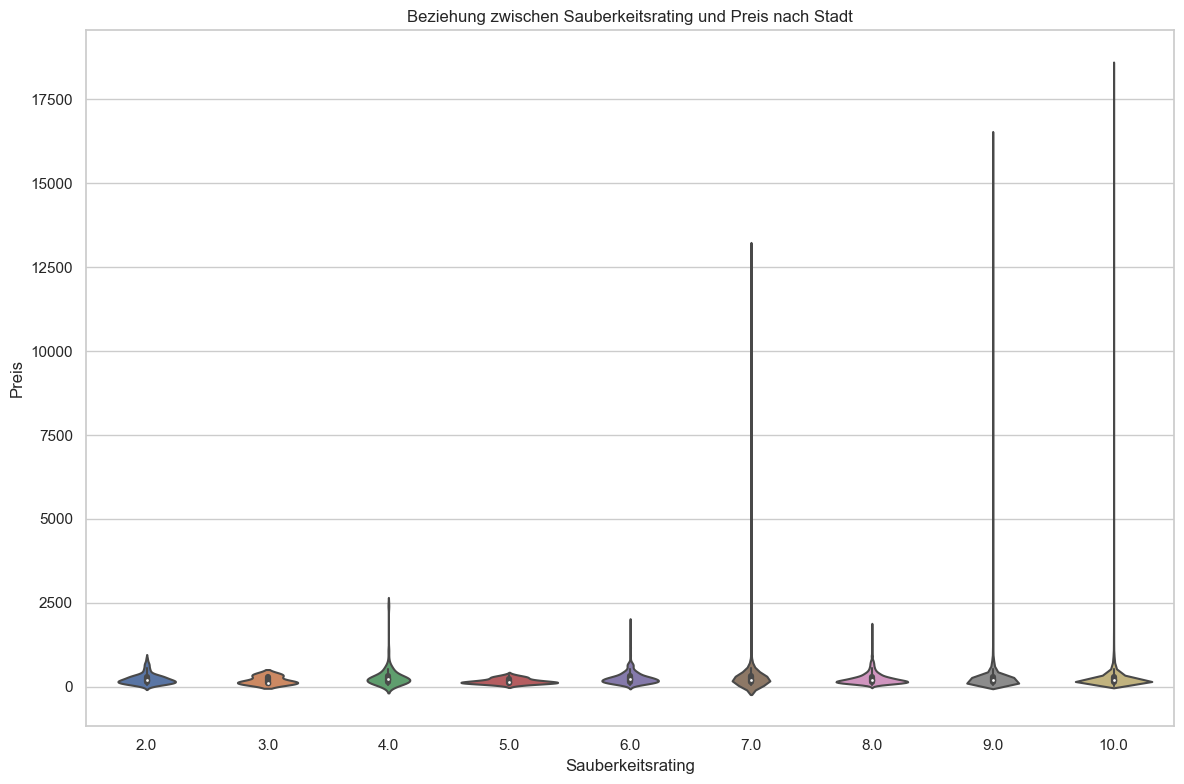

In [198]:
# Erstellen des Streudiagramms mit Seaborn
plt.figure(figsize=(12, 8))
sns.violinplot(data=airbnb_data, x="Cleanliness Rating", y="Price", alpha=0.6)

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Sauberkeitsrating")
plt.ylabel("Preis")
plt.title("Beziehung zwischen Sauberkeitsrating und Preis nach Stadt")



# Verbessern des Layouts
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

In [103]:
airbnb_data_srt = airbnb_data[["City", "Cleanliness Rating", "Price"]]
airbnb_data_srt

City  Cleanliness Rating       Price
0      Amsterdam                10.0  194.033698
1      Amsterdam                 8.0  344.245776
2      Amsterdam                 9.0  264.101422
3      Amsterdam                 9.0  433.529398
4      Amsterdam                10.0  485.552926
...          ...                 ...         ...
41709     Vienna                10.0  715.938574
41710     Vienna                 8.0  304.793960
41711     Vienna                10.0  637.168969
41712     Vienna                10.0  301.054157
41713     Vienna                10.0  133.230489

[41714 rows x 3 columns]

In [199]:
# Erstellen des Violindiagramms mit Plotly Express
fig = px.violin(airbnb_data_srt, 
                x="Cleanliness Rating", 
                y="Price", 
                box=True, 
                hover_data=airbnb_data_srt.columns
                )

# Anpassen des Layouts
fig.update_layout(
    title="Beziehung zwischen Sauberkeitsrating und Preis",
    xaxis_title="Sauberkeitsrating",
    yaxis_title="Preis",
    width=1500,
    height=600
)

# Anzeigen des Diagramms
fig.show()

# Korrelationsmatrix

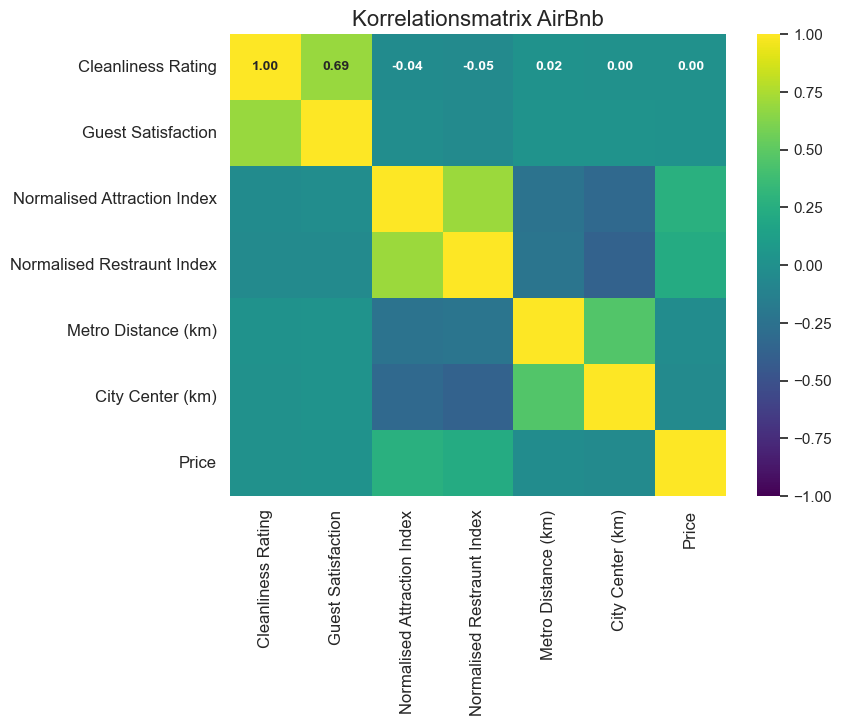

In [159]:
# Erstellen der Korrelationsmatrix
cor_matrix = airbnb_data[
    ["Cleanliness Rating",
     "Guest Satisfaction",
     "Normalised Attraction Index",
     "Normalised Restraunt Index", "Metro Distance (km)",
     "City Center (km)",
     "Price"]
     ].corr()

# Erstellen des Heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap="viridis", fmt=".2f", vmin=-1, vmax=1,annot_kws={'weight': 'bold', 'size': 10})
plt.title("Korrelationsmatrix AirBnb", fontsize=16)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

# Zufriedenheit/ Attraktivität

In [140]:
# Varianz und Standartabweichung von Normalised Attraction Index 
variance = airbnb_data["Normalised Attraction Index"].var()
std = airbnb_data["Normalised Attraction Index"].std()

# Varianz und Standartabweichung von Kundenzufriedenheit
variance_2 = airbnb_data["Guest Satisfaction"].var()
std_2 = airbnb_data["Guest Satisfaction"].std()


print(
    f"Varianz Kundenzufriedenheit: {variance_2:.2f}",
    f"Standartabweichung Kundenzufriedenheit: {std_2:.2f}",
    f"Varianz Normalisierter Attraktivitätsindex: {variance:.2f}",
    f"Standartabweichung Normalisierter Attraktivitätsindex: {std:.2f}",
    sep="\n",
    )

Varianz Kundenzufriedenheit: 66.29
Standartabweichung Kundenzufriedenheit: 8.14
Varianz Normalisierter Attraktivitätsindex: 70.21
Standartabweichung Normalisierter Attraktivitätsindex: 8.38


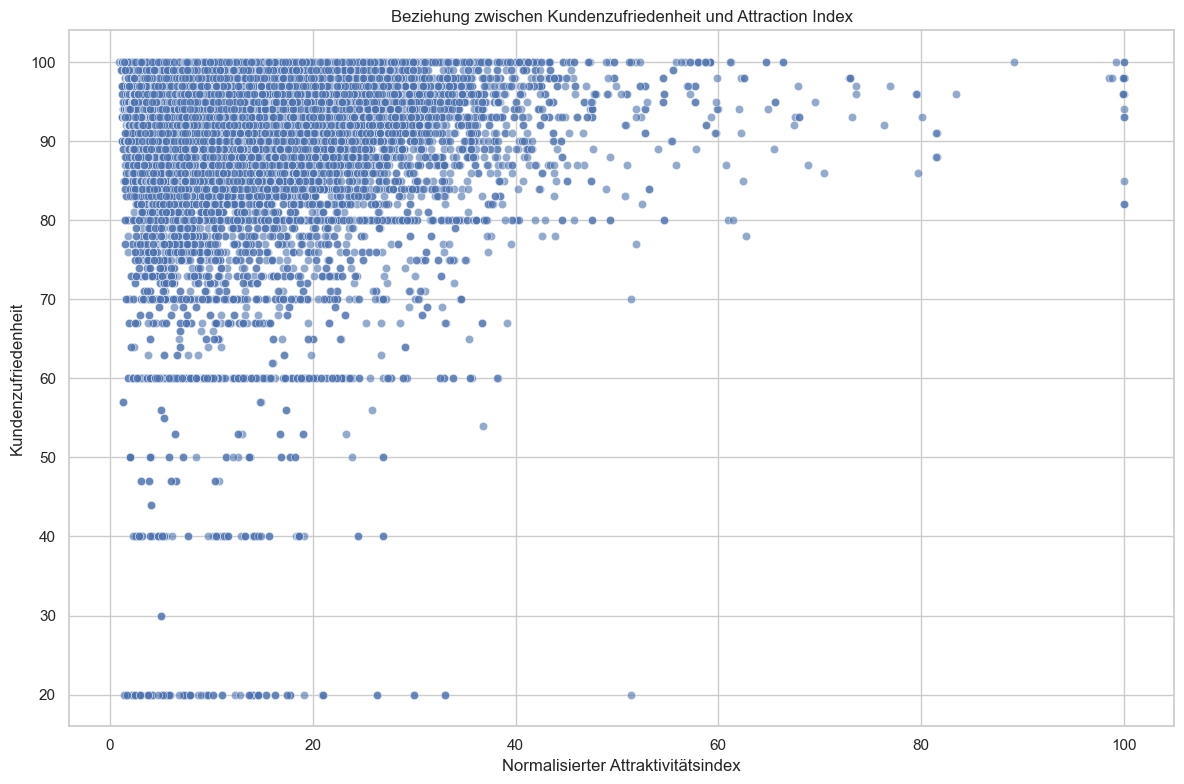

In [202]:
# Erstellen des Streudiagramms mit Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=airbnb_data, x="Normalised Attraction Index", y="Guest Satisfaction", alpha=0.6)

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Normalisierter Attraktivitätsindex")
plt.ylabel("Kundenzufriedenheit")
plt.title("Beziehung zwischen Kundenzufriedenheit und Attraction Index")



# Verbessern des Layouts
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

# Zufriedenheit / Preis

In [164]:
# Varianz und Standartabweichung von Normalised Attraction Index 
variance = airbnb_data["Price"].var()
std = airbnb_data["Price"].std()

# Varianz und Standartabweichung von Kundenzufriedenheit
variance_2 = airbnb_data["Guest Satisfaction"].var()
std_2 = airbnb_data["Guest Satisfaction"].std()


print(
    f"Varianz Kundenzufriedenheit: {variance_2:.2f}",
    f"Standartabweichung Kundenzufriedenheit: {std_2:.2f}",
    f"Varianz Normalisierter Preis: {variance:.2f}",
    f"Standartabweichung Preis: {std:.2f}",
    sep="\n",
    )

Varianz Kundenzufriedenheit: 66.29
Standartabweichung Kundenzufriedenheit: 8.14
Varianz Normalisierter Preis: 78069.11
Standartabweichung Preis: 279.41


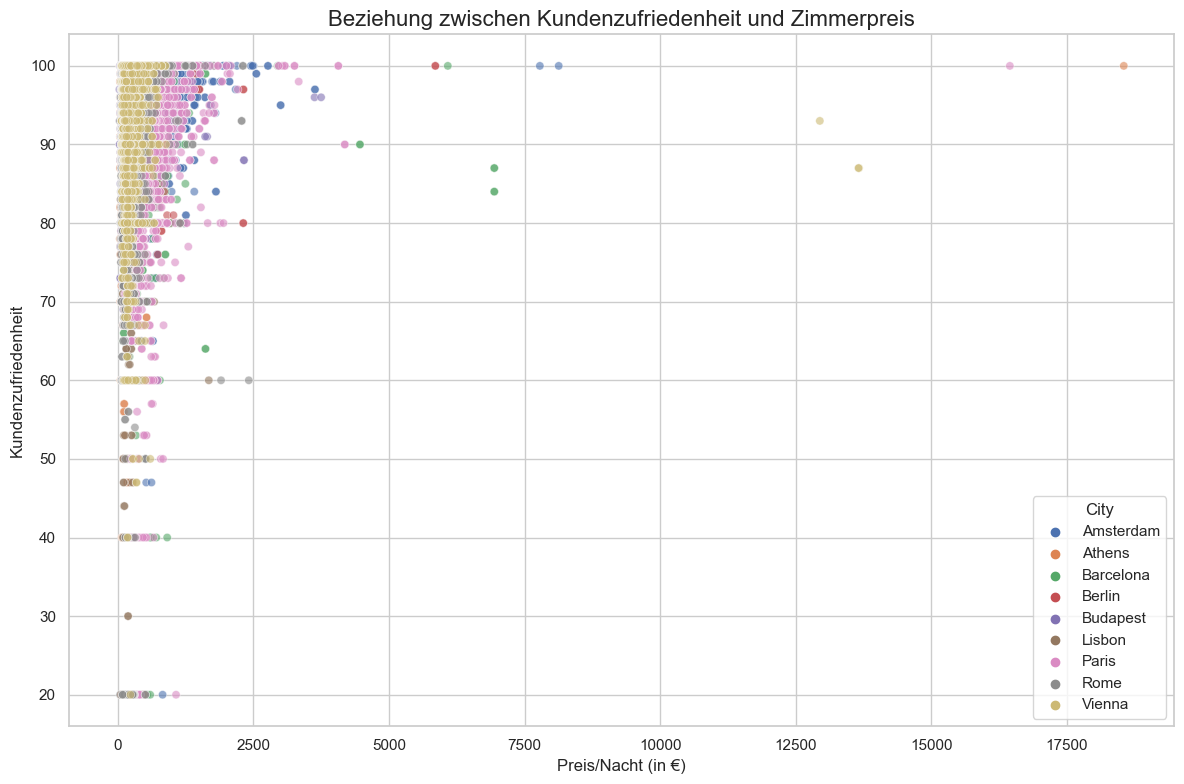

In [200]:
# Erstellen des Streudiagramms mit Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=airbnb_data, x="Price", y="Guest Satisfaction", hue="City", alpha=0.6)

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Preis/Nacht (in €)", fontsize=12)
plt.ylabel("Kundenzufriedenheit", fontsize=12)
plt.title("Beziehung zwischen Kundenzufriedenheit und Zimmerpreis", fontsize=16)


# Verbessern des Layouts
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

# Zufriedenheit / Restaurants

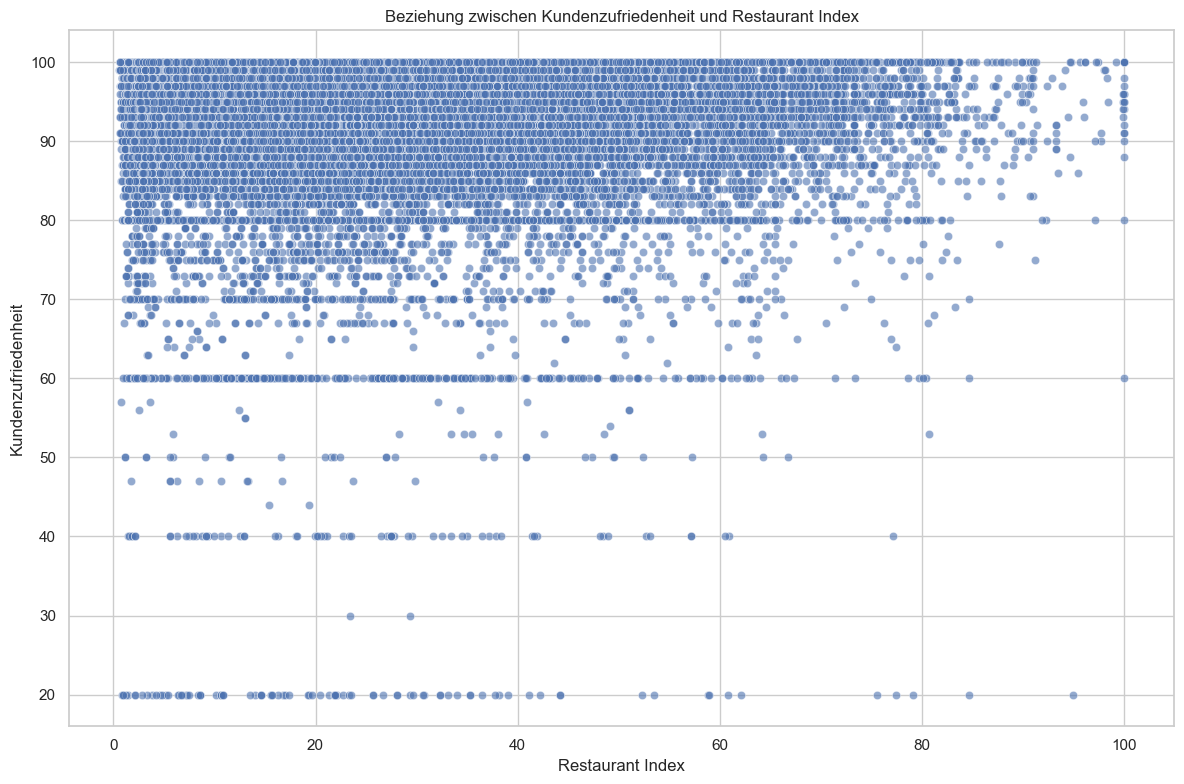

In [201]:
# Erstellen des Streudiagramms mit Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=airbnb_data, x="Normalised Restraunt Index", y="Guest Satisfaction", alpha=0.6)

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Restaurant Index")
plt.ylabel("Kundenzufriedenheit")
plt.title("Beziehung zwischen Kundenzufriedenheit und Restaurant Index")



# Verbessern des Layouts
plt.tight_layout()

# Anzeigen des Diagramms
plt.show()

Keine Aussage

# Erstellung eines Subplots

Dies dient zur Präsentation

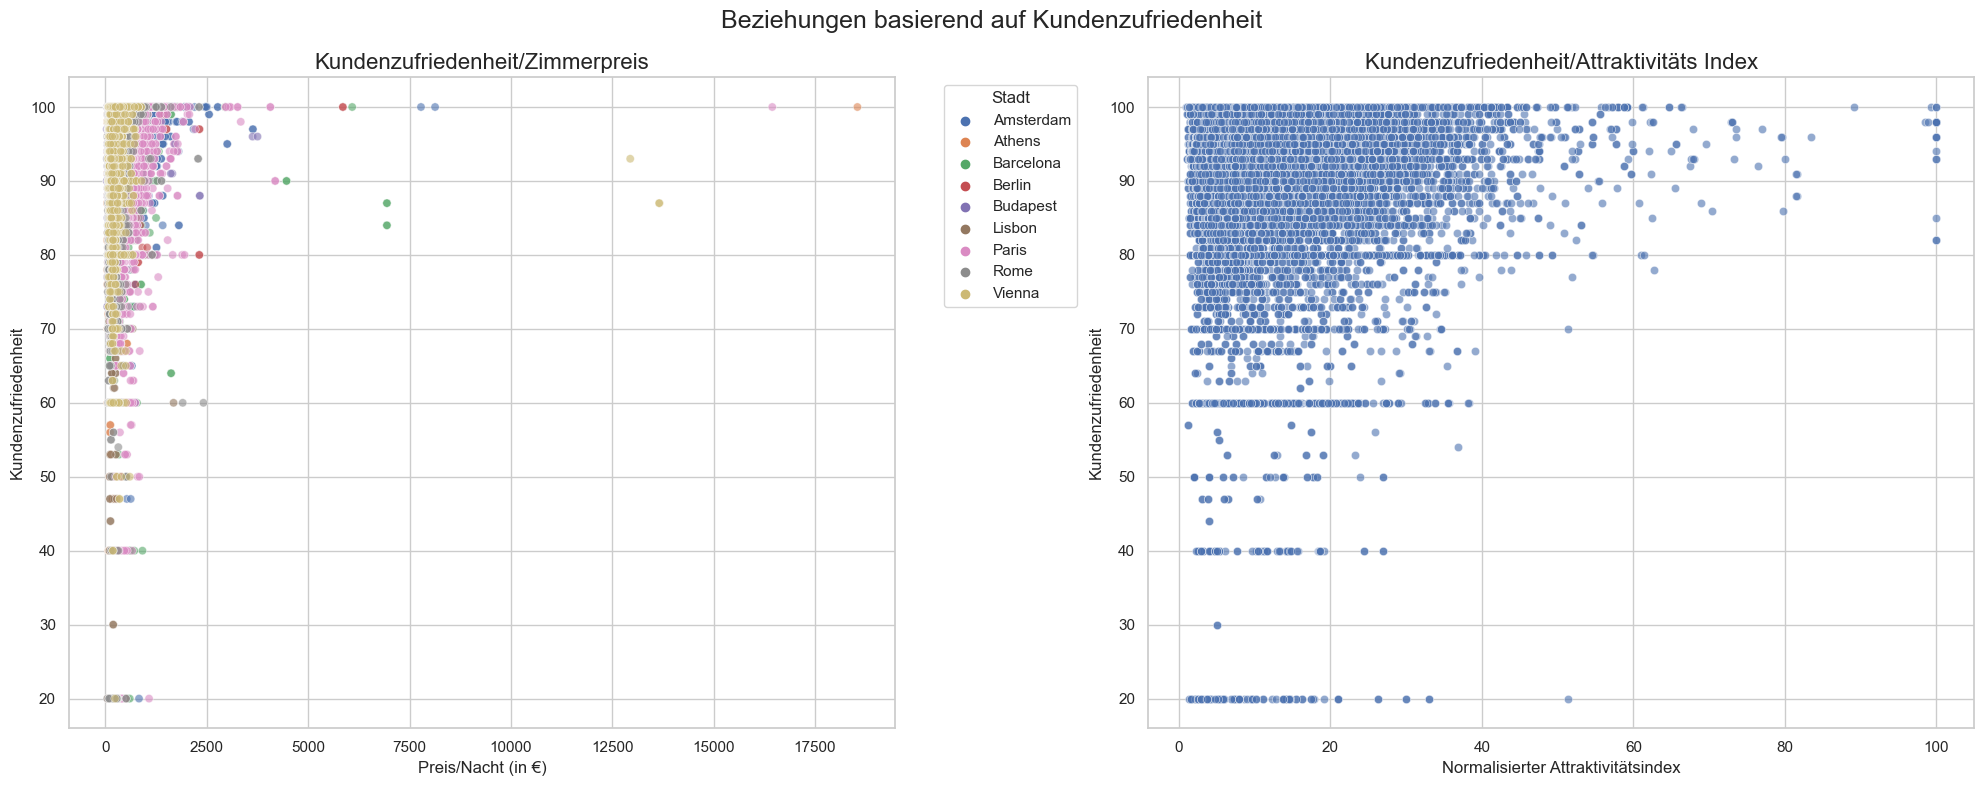

In [195]:
# Erstellen der Figure und der Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Diagramm 1: Kundenzufriedenheit vs. Zimmerpreis
sns.scatterplot(data=airbnb_data, x="Price", y="Guest Satisfaction", hue="City", alpha=0.6, ax=ax1)
ax1.set_xlabel("Preis/Nacht (in €)", fontsize=12)
ax1.set_ylabel("Kundenzufriedenheit", fontsize=12)
ax1.set_title("Kundenzufriedenheit/Zimmerpreis", fontsize=16)
ax1.legend(title="Stadt", bbox_to_anchor=(1.05, 1), loc="upper left")

# Diagramm 2: Kundenzufriedenheit vs. Attraction Index
sns.scatterplot(data=airbnb_data, x="Normalised Attraction Index", y="Guest Satisfaction", alpha=0.6, ax=ax2)
ax2.set_xlabel("Normalisierter Attraktivitätsindex", fontsize=12)
ax2.set_ylabel("Kundenzufriedenheit", fontsize=12)
ax2.set_title("Kundenzufriedenheit/Attraktivitäts Index", fontsize=16)

# Anpassen des Layouts
plt.suptitle("Beziehungen basierend auf Kundenzufriedenheit", fontsize=18)
plt.tight_layout()


# Anzeigen der Diagramme
plt.show()